<a href="https://www.kaggle.com/code/jimschacko/churn-modeling-with-logistic-regression?scriptVersionId=118057369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')

In [3]:
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
#dropping unnecessary columns 
dataset = dataset.drop(columns = ['CustomerId','Surname', 'RowNumber'])

In [10]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
dataset_2 = dataset.drop(columns = 'Exited')

<AxesSubplot:title={'center':'Correlation index'}>

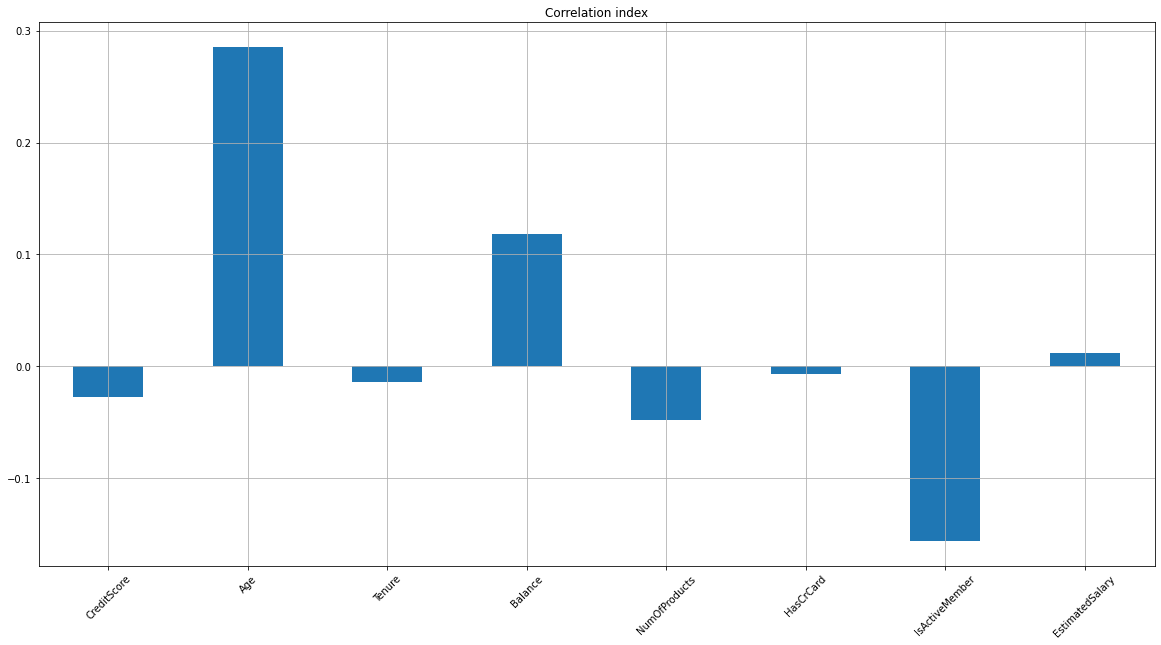

In [12]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize = (20,10), title = 'Correlation index', rot = 45, grid = True)

<AxesSubplot:>

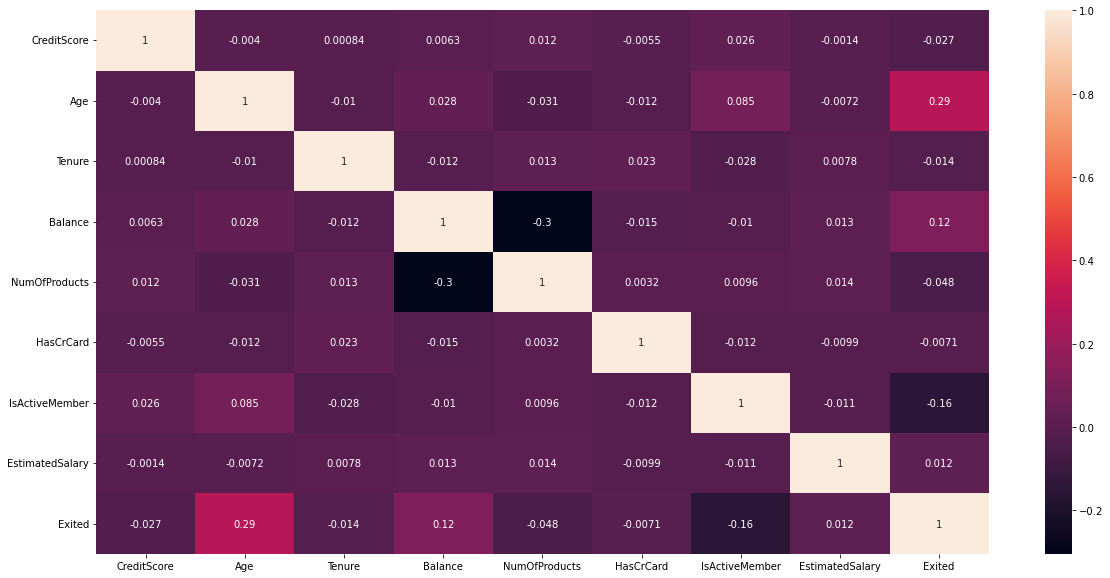

In [13]:
corr = dataset.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

In [14]:
#Encoding the categorical data
dataset.select_dtypes(include = 'object')

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [15]:
dataset = pd.get_dummies(data=dataset, drop_first = True)

In [16]:
dataset.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

<AxesSubplot:>

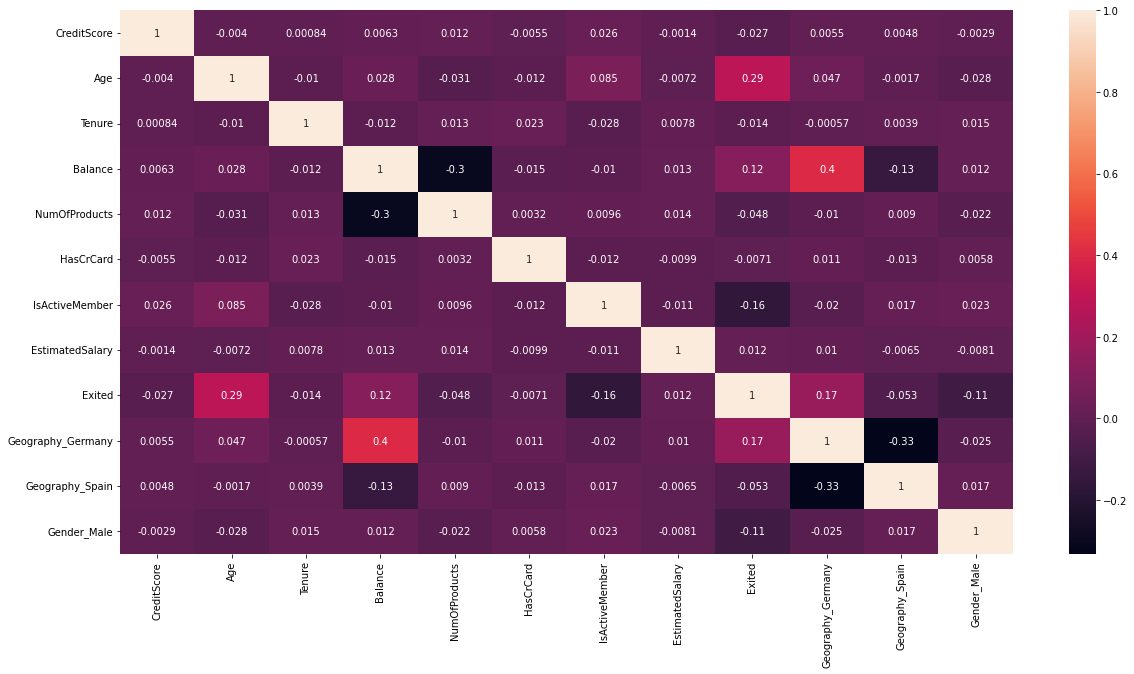

In [17]:
corr = dataset.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

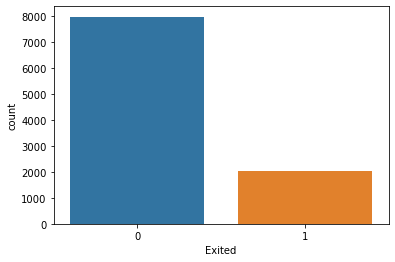

In [18]:
sns.countplot(dataset['Exited'], label='Count')
plt.show()

In [19]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
x = dataset.drop(columns = 'Exited')

In [21]:
y = dataset['Exited']

In [22]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 45)

In [25]:
#Feature scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
#Model using Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred = lr.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [29]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [30]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8164,0.640212,0.236328,0.345221


In [31]:
cm = confusion_matrix(y_pred,y_test)

In [32]:
print(cm)

[[1920  391]
 [  68  121]]


In [33]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.97 %
Standard Deviation is 1.02 %


In [34]:
#randomised search to find best parameters and builind the final model
from sklearn.model_selection import RandomizedSearchCV

parameters = {'penalty': ['l1','l2','elasticnet','none'],
             'C': [0.25,0.30,0.40,0.50,0.60,0.55, 0.75,1.0,1.25,1.50,1.75,2.0,5.0,10.0],
             'solver': ['newton-cg','saga','sag','lbfgs','liblinear']}
random_search = RandomizedSearchCV(estimator = lr, param_distributions = parameters, n_iter=10,
                                  scoring = 'roc_auc',n_jobs = -1,cv = 10, verbose = 3)


In [35]:
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.25, 0.3, 0.4, 0.5, 0.6, 0.55,
                                              0.75, 1.0, 1.25, 1.5, 1.75, 2.0,
                                              5.0, 10.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'saga', 'sag',
                                                   'lbfgs', 'liblinear']},
                   scoring='roc_auc', verbose=3)

In [36]:
random_search.best_estimator_

LogisticRegression(C=1.75, penalty='l1', solver='liblinear')

In [37]:
random_search.best_params_


{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.75}

In [38]:
#final Model
from sklearn.linear_model import LogisticRegression
final_model = LogisticRegression(solver = 'sag', penalty = 'l2', C = 0.3)
final_model.fit(x_train,y_train)


LogisticRegression(C=0.3, solver='sag')

In [39]:
y_pred = final_model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [41]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8164,0.641711,0.234375,0.343348


In [42]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[1921  392]
 [  67  120]]


In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=final_model, X=x_train, y=y_train, cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.95 %
Standard Deviation is 1.00 %
